In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve


In [4]:
#Import and read data
df = pd.read_csv('D:\Study-3rd(1st)\Thesis\Thesis\data\car_price_dataset (1).csv')

df.head()

<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:2: SyntaxWarning: invalid escape sequence '\S'
C:\Users\MANH HUNG\AppData\Local\Temp\ipykernel_21476\957505244.py:2: SyntaxWarning: invalid escape sequence '\S'
  df = pd.read_csv('D:\Study-3rd(1st)\Thesis\Thesis\data\car_price_dataset (1).csv')


,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [5]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Cột '{column}' có các giá trị không trùng nhau: {unique_values}")

Cột 'Brand' có các giá trị không trùng nhau: ['Kia' 'Chevrolet' 'Mercedes' 'Audi' 'Volkswagen' 'Toyota' 'Honda' 'BMW'
 'Hyundai' 'Ford']
Cột 'Model' có các giá trị không trùng nhau: ['Rio' 'Malibu' 'GLA' 'Q5' 'Golf' 'Camry' 'Civic' 'Sportage' 'RAV4'
 '5 Series' 'CR-V' 'Elantra' 'Tiguan' 'Equinox' 'Explorer' 'A3' '3 Series'
 'Tucson' 'Passat' 'Impala' 'Corolla' 'Optima' 'Fiesta' 'A4' 'Focus'
 'E-Class' 'Sonata' 'C-Class' 'X5' 'Accord']
Cột 'Year' có các giá trị không trùng nhau: [2020 2012 2023 2003 2007 2010 2001 2014 2005 2013 2009 2004 2017 2006
 2000 2021 2018 2016 2011 2022 2008 2015 2002 2019]
Cột 'Engine_Size' có các giá trị không trùng nhau: [4.2 2.  2.6 2.7 3.4 4.7 3.1 1.3 4.5 4.8 2.3 2.4 3.2 2.9 1.5 1.8 4.6 2.8
 3.9 3.3 1.9 3.5 1.4 2.2 1.  1.2 4.9 3.6 3.8 4.  1.7 1.6 4.1 1.1 2.5 3.
 5.  2.1 3.7 4.3 4.4]
Cột 'Fuel_Type' có các giá trị không trùng nhau: ['Diesel' 'Hybrid' 'Electric' 'Petrol']
Cột 'Transmission' có các giá trị không trùng nhau: ['Manual' 'Automatic' 'Semi-Automat

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [7]:
df["Price"].describe()

count    10000.00000
mean      8852.96440
std       3112.59681
min       2000.00000
25%       6646.00000
50%       8858.50000
75%      11086.50000
max      18301.00000
Name: Price, dtype: float64

In [8]:
#Encode

brand_mapping = {
    "Audi": 0, "BMW": 1, "Chevrolet": 2, "Ford": 3, "Honda": 4,
    "Hyundai": 5, "Kia": 6, "Mercedes": 7, "Toyota": 8, "Volkswagen": 9
}

model_mapping = {
    "Q5": 0, "A3": 1, "A4": 2, "3 Series": 0, "5 Series": 1, "X5": 2,
    "Malibu": 0, "Equinox": 1, "Impala": 2, "Explorer": 0, "Focus": 1, "Fiesta": 2,
    "Accord": 0, "CR-V": 1, "Civic": 2, "Tucson": 0, "Elantra": 1, "Sonata": 2,
    "Sportage": 0, "Rio": 1, "Optima": 2, "GLA": 0, "C-Class": 1, "E-Class": 2,
    "RAV4": 0, "Corolla": 1, "Camry": 2, "Golf": 0, "Passat": 1, "Tiguan": 2
}

fuel_type_mapping = {
    "Electric": 0, "Diesel": 1, "Hybrid": 2, "Petrol": 3
}

transmission_mapping = {
    "Manual": 0, "Automatic": 1, "Semi-Automatic": 2,
}

df["Brand_Encoded"] = df["Brand"].map(brand_mapping)
df["Model_Encoded"] = df["Model"].map(model_mapping)
df["Fuel_Type_Encoded"] = df["Fuel_Type"].map(fuel_type_mapping)
df["Transmission_Encoded"] = df["Transmission"].map(transmission_mapping)

df.head(10)

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price,Brand_Encoded,Model_Encoded,Fuel_Type_Encoded,Transmission_Encoded
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501,6,1,1,0
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092,2,0,2,1
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171,7,0,1,1
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780,0,0,0,0
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867,9,0,2,2
5,Toyota,Camry,2007,2.7,Petrol,Automatic,157889,4,4,7242,8,2,3,1
6,Honda,Civic,2010,3.4,Electric,Automatic,139584,3,1,11208,4,2,0,1
7,Kia,Sportage,2001,4.7,Electric,Semi-Automatic,157495,2,2,7950,6,0,0,2
8,Kia,Sportage,2014,2.6,Hybrid,Manual,98700,3,4,9926,6,0,2,0
9,Toyota,RAV4,2005,3.1,Petrol,Manual,107724,2,5,6545,8,0,3,0


In [9]:
encoded_df_order = ["Brand_Encoded", "Model_Encoded", "Year", "Engine_Size", "Fuel_Type_Encoded", "Transmission_Encoded", "Mileage", "Doors", "Owner_Count", "Price"]
encoded_df = df[encoded_df_order]
encoded_df.head()


,Brand_Encoded,Model_Encoded,Year,Engine_Size,Fuel_Type_Encoded,Transmission_Encoded,Mileage,Doors,Owner_Count,Price
0,6,1,2020,4.2,1,0,289944,3,5,8501
1,2,0,2012,2.0,2,1,5356,2,3,12092
2,7,0,2020,4.2,1,1,231440,4,2,11171
3,0,0,2023,2.0,0,0,160971,2,1,11780
4,9,0,2003,2.6,2,2,286618,3,3,2867


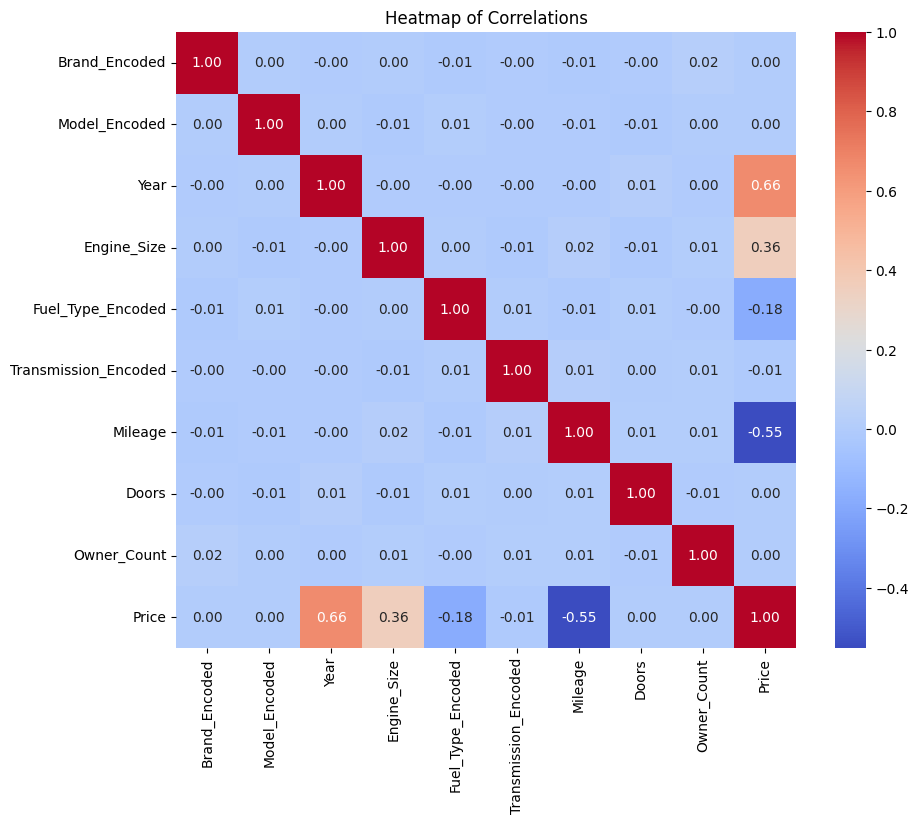

In [10]:
#Plot Heatmap 
correlation_matrix = encoded_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Heatmap of Correlations")
plt.show()

In [11]:
X = encoded_df.drop(columns=["Price"])  # X là tất cả các cột trừ cột "Price"
Y = encoded_df["Price"]  # Y là cột giá trị mục tiêu

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [12]:
#Normalization

# Fit scaler trên X_train và chuẩn hóa X_train và X_test

# scaler = MinMaxScaler()
# scaler.fit(X_train)

# normalized_X_train = scaler.fit_transform(X_train)
# normalized_X_test = scaler.transform(X_test)

# # Fit scaler trên Y_train và chuẩn hóa Y_train 

# scaler_y = MinMaxScaler()
# normalized_Y_train = scaler_y.fit_transform(Y_train.values.reshape(-1, 1))


In [13]:
#Normalization

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

columns_to_normalize = encoded_df.columns.drop('Price')
encoded_df[columns_to_normalize] = scaler.fit_transform(encoded_df[columns_to_normalize])



C:\Users\MANH HUNG\AppData\Local\Temp\ipykernel_21476\3505007025.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  encoded_df[columns_to_normalize] = scaler.fit_transform(encoded_df[columns_to_normalize])


In [14]:
# Display the first few rows to verify normalization
encoded_df.head()

,Brand_Encoded,Model_Encoded,Year,Engine_Size,Fuel_Type_Encoded,Transmission_Encoded,Mileage,Doors,Owner_Count,Price
0,0.666667,0.5,0.869565,0.80,0.333333,0.0,0.966648,0.333333,1.00,8501
1,0.222222,0.0,0.521739,0.25,0.666667,0.5,0.017775,0.000000,0.50,12092
2,0.777778,0.0,0.869565,0.80,0.333333,0.5,0.771584,0.666667,0.25,11171
3,0.000000,0.0,1.000000,0.25,0.000000,0.0,0.536626,0.000000,0.00,11780
4,1.000000,0.0,0.130435,0.40,0.666667,1.0,0.955558,0.333333,0.50,2867


## **Linear Regression**

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
model1 = LinearRegression()

# Huấn luyện mô hình
model1.fit(X_train,Y_train)

# Dự đoán trên tập dữ liệu kiểm tra
Y_pred = model1.predict(X_test)

In [17]:
# Dự đoán trên tập dữ liệu kiểm tra

# Inverse transform Y_pred để đưa kết quả về giá trị ban đầu
# Y_pred = Y_pred.reshape(-1, 1)  # Đảm bảo đúng shape
# Y_pred_original = scaler_y.inverse_transform(Y_pred)


In [18]:
# Đánh giá

mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

Mean Absolute Error (MAE): 635.7050
Mean Squared Error (MSE): 828834.0952
R^2 Score: 0.9098


## **Random Forest**

In [19]:
from sklearn.ensemble import RandomForestRegressor 

In [20]:
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Huấn luyện mô hình
model_rf.fit(X_train, Y_train)

# Dự đoán trên tập dữ liệu kiểm tra
Y_pred_rf = model_rf.predict(X_test)

In [21]:
mae = mean_absolute_error(Y_test, Y_pred_rf)
mse = mean_squared_error(Y_test, Y_pred_rf)
r2 = r2_score(Y_test, Y_pred_rf)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

Mean Absolute Error (MAE): 470.1758
Mean Squared Error (MSE): 331648.3895
R^2 Score: 0.9639


## **Decision Tree**

In [22]:
from sklearn.tree import DecisionTreeRegressor   

In [23]:
model_dt = DecisionTreeRegressor(random_state=42)

# Huấn luyện mô hình
model_dt.fit(X_train, Y_train)

# Dự đoán trên tập dữ liệu kiểm tra
Y_pred_xgb = model_dt.predict(X_test)

In [24]:
mae = mean_absolute_error(Y_test, Y_pred_xgb)
mse = mean_squared_error(Y_test, Y_pred_xgb)
r2 = r2_score(Y_test, Y_pred_xgb)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

Mean Absolute Error (MAE): 724.8140
Mean Squared Error (MSE): 860983.0540
R^2 Score: 0.9063


In [25]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [26]:
import xgboost as xgb

In [27]:
model_xgb = xgb.XGBRegressor()

# Huấn luyện mô hình
model_xgb.fit(X_train, Y_train)

# Dự đoán trên tập dữ liệu kiểm tra
Y_pred_xgb = model_xgb.predict(X_test)

In [28]:
mae = mean_absolute_error(Y_test, Y_pred_xgb)
mse = mean_squared_error(Y_test, Y_pred_xgb)
r2 = r2_score(Y_test, Y_pred_xgb)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

Mean Absolute Error (MAE): 196.2672
Mean Squared Error (MSE): 60463.1211
R^2 Score: 0.9934


## **CNN Deep Learning Model and the 'Data to Image' approach**

In [29]:
import os
from PIL import Image

# Ensure 'car_imgs' directory exists
output_dir = 'car_imgs'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Initialize an empty list to store image labels and corresponding prices
image_labels = []

# Column order for creating the image (all normalized columns except Price)
cols_order = columns_to_normalize

# Create 64x64 images for each row of the dataset
for index, row in encoded_df.iterrows():
    # Initialize a blank white image of 64x64
    img = np.full((4, 4), 255, dtype=np.uint8)
    
    for i in range(min(len(cols_order), 4)):
        for j in range(4):
            value = row[cols_order[i]]
            for k in range(1):
                img[j][i * 1 + k] = int(255 * value)

    # Save the image
    img_name = f'car_{index}.png'
    image_path = os.path.join(output_dir, img_name)
    image = Image.fromarray(img)
    image.save(image_path)

    # Store the image name and corresponding price
    image_labels.append([img_name, row['Price']])

# Save image labels and prices to a CSV
labels_df = pd.DataFrame(image_labels, columns=['Image', 'Price'])
labels_csv_path = os.path.join(output_dir, 'image_labels.csv')
labels_df.to_csv(labels_csv_path, index=False)

# Output confirmation and sample images/labels
labels_df.head(), os.listdir(output_dir)[:5]


(       Image    Price
 0  car_0.png   8501.0
 1  car_1.png  12092.0
 2  car_2.png  11171.0
 3  car_3.png  11780.0
 4  car_4.png   2867.0,
 ['car_0.png', 'car_1.png', 'car_10.png', 'car_100.png', 'car_1000.png'])

In [30]:
%pip install opencv-python
%pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.
  You can safely remove it manually.



  Using cached numpy-2.0.2-cp312-cp312-win_amd64.whl.metadata (59 kB)
Using cached numpy-2.0.2-cp312-cp312-win_amd64.whl (15.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.3
    Uninstalling numpy-2.2.3:
      Successfully uninstalled numpy-2.2.3


In [31]:
%pip install setuptools

In [32]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [53]:

# Giả lập dữ liệu giá và tên ảnh
data = pd.DataFrame({
    'Image': [f'car_{i}.png' for i in range(10000)],  # Giả sử tên ảnh là car_0.png, car_1.png, ...
    'Price': [8501, 12092, 11171, 11780, 2867] + list(np.random.randint(2000, 15000, 9995))  # Giá xe giả lập
})

# Đường dẫn tới folder chứa ảnh
image_folder = 'D:\\Study-3rd(1st)\\Thesis\\Thesis\\car_imgs'

# Hàm load ảnh grayscale với kích thước 4x4
def load_images(image_paths, target_size=(4, 4)):
    images = []
    for img_path in image_paths:
        full_path = os.path.join(image_folder, img_path)
        try:
            # Load ảnh grayscale và resize về 4x4
            img = load_img(full_path, target_size=target_size, color_mode='grayscale')
            img_array = img_to_array(img) / 255.0  # Normalize ảnh về [0, 1]
            images.append(img_array)
        except Exception as e:
            print(f"Error loading image {full_path}: {e}")
            continue
    return np.array(images)

# Load toàn bộ ảnh
X_images = load_images(data['Image'])
y_prices = data['Price'].values.reshape(-1, 1)  # Chuyển giá về vector cột

# Scale giá trị price về khoảng [0, 1] để dễ huấn luyện
scaler = MinMaxScaler()
y_prices_scaled = scaler.fit_transform(y_prices)

# Chia tập train/test
X_train, X_test, y_train, y_test = train_test_split(X_images, y_prices_scaled, test_size=0.2, random_state=42)


In [62]:
from tensorflow.keras import layers, models

# Xây dựng model CNN
model = models.Sequential([
    layers.Conv2D(32, (2, 2), activation='relu', input_shape=(4, 4, 1)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='linear')  # Dự đoán giá trị liên tục
])

# Biên dịch model với loss function Mean Squared Error (MSE)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

model.summary()

d:\PythonCDMM\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 3, 3, 32)       │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,473 (177.63 KB)

 Trainable params: 45,473 (177.63 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
# Huấn luyện model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32
)

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1068 - mae: 0.2728 - val_loss: 0.0856 - val_mae: 0.2543
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0847 - mae: 0.2515 - val_loss: 0.0856 - val_mae: 0.2546
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0848 - mae: 0.2514 - val_loss: 0.0854 - val_mae: 0.2545
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0829 - mae: 0.2496 - val_loss: 0.0865 - val_mae: 0.2563
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0842 - mae: 0.2511 - val_loss: 0.0868 - val_mae: 0.2562
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0830 - mae: 0.2485 - val_loss: 0.0860 - val_mae: 0.2547
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0839 - mae: 0.2511 - val_loss: 0.0856 - val_mae: 0.2550
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0833 - mae: 0.2500 - val_loss: 0.0865 - val_mae: 0.2558
Epoch 9/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - lo

In [60]:
Y_pred_cnn = model.predict(X_test)

print(y_test.shape, Y_pred_cnn.shape)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
(2000, 1) (2000, 1)


In [61]:
mae = mean_absolute_error(y_test, Y_pred_cnn)
mse = mean_squared_error(y_test, Y_pred_cnn)
r2 = r2_score(y_test, y_pred_cnn)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

Mean Absolute Error (MAE): 0.2548
Mean Squared Error (MSE): 0.0856
R^2 Score: -0.0375
